In [2]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [3]:
url = "https://prices.runescape.wiki/api/v1/osrs/timeseries?timestep=24h&id=21006"
headers = {
    "User-Agent": "Timeseries Data Science Coding Project (Limited Use)"
}
response = requests.get(url, headers=headers)

In [4]:
# Check the response status
if response.status_code == 200:
    data = response.json()
    print("Data received:")
else:
    print(f"Request failed with status code {response.status_code}")
    print(response.text)

Data received:


In [5]:
full_item_df = pd.json_normalize(data['data'])

In [6]:
full_item_df['timestamp'] = pd.to_datetime(full_item_df['timestamp'], unit='s', utc=True)
full_item_df['date'] = full_item_df['timestamp'].dt.date

In [7]:
item_df = full_item_df[['date', 'avgHighPrice']]
item_df['date'] = pd.to_datetime(item_df['date'])
item_df.set_index('date', inplace=True)
item_df.head()

<ipython-input-7-431340b488f5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  item_df['date'] = pd.to_datetime(item_df['date'])


,avgHighPrice
date,
2024-09-16,120363445
2024-09-17,119970473
2024-09-18,119908458
2024-09-19,120271531
2024-09-20,120524941


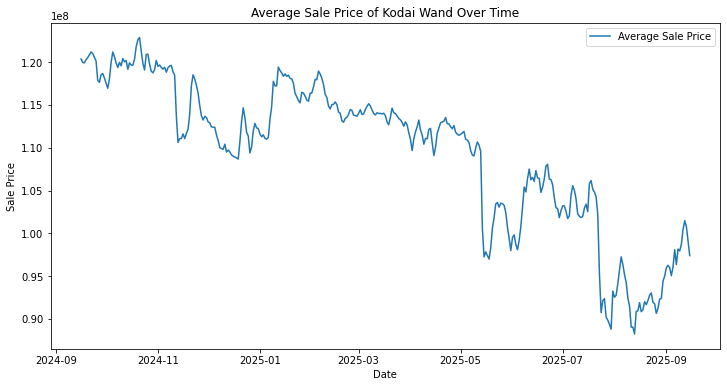

In [8]:
plt.figure(figsize=(12, 6))
plt.plot(item_df['avgHighPrice'], label='Average Sale Price')
plt.title('Average Sale Price of Kodai Wand Over Time')
plt.xlabel('Date')
plt.ylabel('Sale Price')
plt.legend()
plt.show()

In [9]:
item_df_train = item_df.iloc[:-90]
item_df_test = item_df.iloc[-90:]

print(item_df_train.size)
print(item_df_test.size)

275
90


# Non-Stationary Model

In [10]:
model = SARIMAX(item_df_train['avgHighPrice'], order=(0, 1, 0))
results = model.fit()

c:\Users\bmsuc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\bmsuc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [11]:
forecast = results.get_forecast(steps=90)
forecast_values = forecast.predicted_mean
forecast_values.index = item_df_test.index
forecast_values.head()

date
2025-06-18    106397985.0
2025-06-19    106397985.0
2025-06-20    106397985.0
2025-06-21    106397985.0
2025-06-22    106397985.0
Name: predicted_mean, dtype: float64

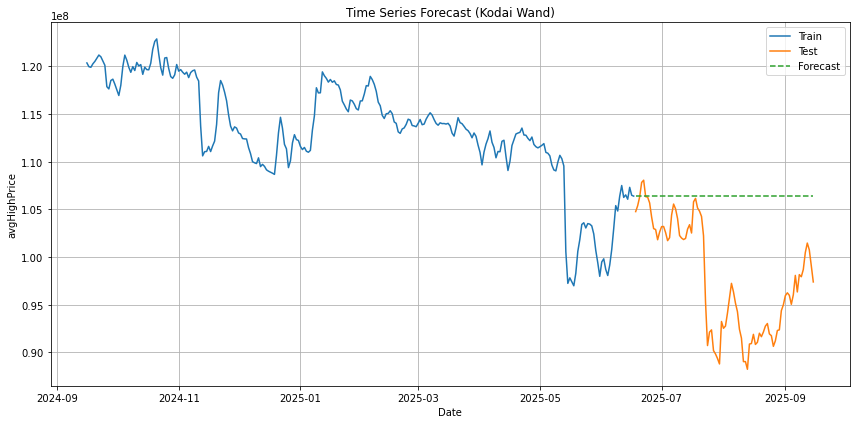

In [12]:
plt.figure(figsize=(12,6))
plt.plot(item_df_train.index, item_df_train['avgHighPrice'], label='Train')
plt.plot(item_df_test.index, item_df_test['avgHighPrice'], label='Test')
plt.plot(forecast_values.index, forecast_values, label='Forecast', linestyle='--')
plt.title('Time Series Forecast (Kodai Wand)')
plt.xlabel('Date')
plt.ylabel('avgHighPrice')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Stationary Model

In [13]:
model = SARIMAX(item_df_train['avgHighPrice'], order=(1, 0, 0))
results = model.fit()

c:\Users\bmsuc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\bmsuc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [14]:
forecast = results.get_forecast(steps=90)
forecast_values = forecast.predicted_mean
forecast_values.index = item_df_test.index
forecast_values.head()

date
2025-06-18    1.063923e+08
2025-06-19    1.063866e+08
2025-06-20    1.063808e+08
2025-06-21    1.063751e+08
2025-06-22    1.063694e+08
Name: predicted_mean, dtype: float64

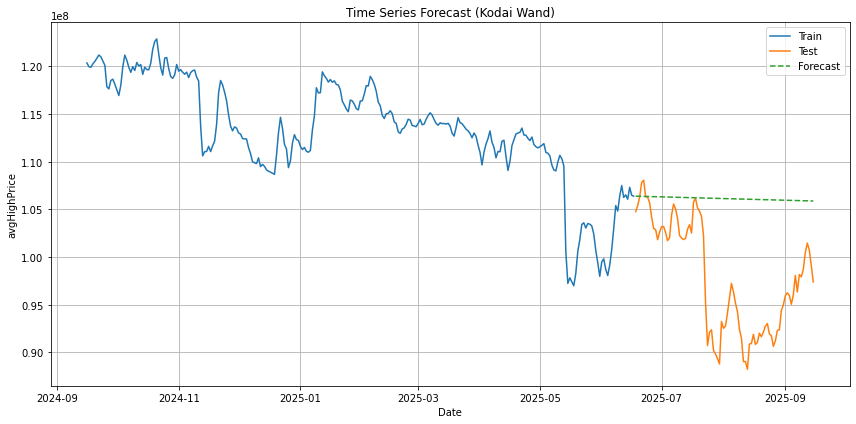

In [15]:
plt.figure(figsize=(12,6))
plt.plot(item_df_train.index, item_df_train['avgHighPrice'], label='Train')
plt.plot(item_df_test.index, item_df_test['avgHighPrice'], label='Test')
plt.plot(forecast_values.index, forecast_values, label='Forecast', linestyle='--')
plt.title('Time Series Forecast (Kodai Wand)')
plt.xlabel('Date')
plt.ylabel('avgHighPrice')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Seasonal Model

In [16]:
model = SARIMAX(item_df_train['avgHighPrice'], order=(0, 1, 0), seasonal_order=(1, 1, 1, 7))
results = model.fit()

c:\Users\bmsuc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\bmsuc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [17]:
forecast = results.get_forecast(steps=90)
forecast_values = forecast.predicted_mean
forecast_values.index = item_df_test.index
forecast_values.head()

date
2025-06-18    1.072758e+08
2025-06-19    1.062393e+08
2025-06-20    1.065045e+08
2025-06-21    1.061527e+08
2025-06-22    1.072235e+08
Name: predicted_mean, dtype: float64

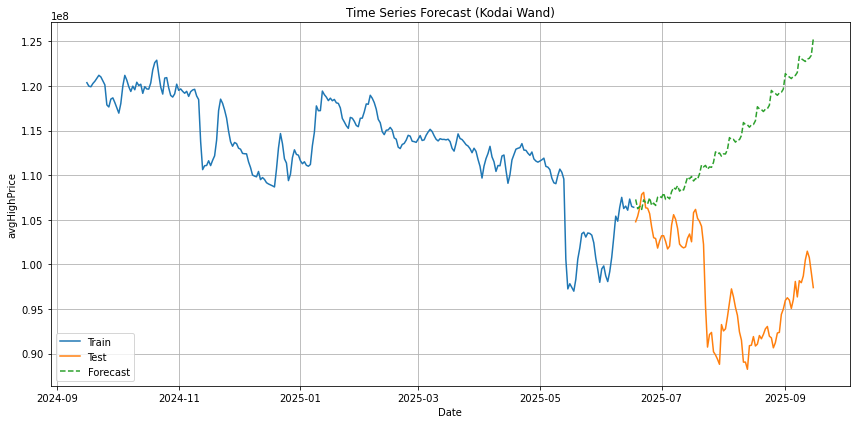

In [18]:
plt.figure(figsize=(12,6))
plt.plot(item_df_train.index, item_df_train['avgHighPrice'], label='Train')
plt.plot(item_df_test.index, item_df_test['avgHighPrice'], label='Test')
plt.plot(forecast_values.index, forecast_values, label='Forecast', linestyle='--')
plt.title('Time Series Forecast (Kodai Wand)')
plt.xlabel('Date')
plt.ylabel('avgHighPrice')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Extreme Model

In [19]:
model = SARIMAX(item_df_train['avgHighPrice'], order=(1, 0, 1), seasonal_order=(1, 1, 1, 31))
results = model.fit()

c:\Users\bmsuc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\bmsuc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [20]:
forecast = results.get_forecast(steps=90)
forecast_values = forecast.predicted_mean
forecast_values.index = item_df_test.index
forecast_values.head()

date
2025-06-18    9.842760e+07
2025-06-19    9.727575e+07
2025-06-20    9.866411e+07
2025-06-21    9.912950e+07
2025-06-22    1.014347e+08
Name: predicted_mean, dtype: float64

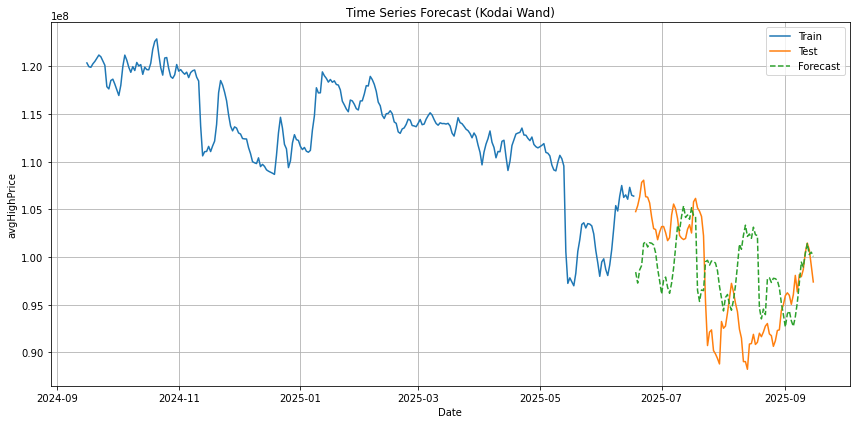

In [21]:
plt.figure(figsize=(12,6))
plt.plot(item_df_train.index, item_df_train['avgHighPrice'], label='Train')
plt.plot(item_df_test.index, item_df_test['avgHighPrice'], label='Test')
plt.plot(forecast_values.index, forecast_values, label='Forecast', linestyle='--')
plt.title('Time Series Forecast (Kodai Wand)')
plt.xlabel('Date')
plt.ylabel('avgHighPrice')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()